In [1]:
"""
Authors: Rafail Islam, Amber Gillenwaters 

"""
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
df = pd.read_csv("nostop.lemmas.csv")

In [3]:
# Drop any NaN rows
df = df.dropna()

In [4]:
df= df.iloc[3000:4000]

In [5]:
def encode_target(df, target_column, column_name):
    """Add column to df with integers for the target.

    Args
    ----
    df -- pandas DataFrame.
    target_column -- column to map to int, producing
                     new Target column.

    Returns
    -------
    df_mod -- modified DataFrame.
    targets -- list of target names.
    """
    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod[column_name] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)


In [6]:
df, cue = encode_target(df, "cue", "cue_code")
df, feature = encode_target(df, "feature", "feature_code")
df, pos_code = encode_target(df, "pos", "pos_code")
df, targets = encode_target(df, "lemma", "target")

In [7]:
features = list(df.columns[5:7])
Y = df["target"]
X = df[features]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
     X, Y, test_size=0.20, random_state=42)


In [9]:
dt = tree.DecisionTreeClassifier(min_samples_split=20, random_state=99)
clf = dt.fit(X_train, y_train)
predicted_output = clf.predict(X_test)


In [10]:
dot_data = tree.export_graphviz(clf, filled=True, rounded=True,
                                feature_names=features,
                               class_names=targets)

In [11]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [12]:
y = y_test.tolist()
actual_output = np.array(y)

In [13]:
# fitness fuction
def fcn_fitness(actual_output, predicted_output):
    fitness = 0
    ln = len(actual_output)
    for i in range(ln):
        #print(actual_output[i], predicted_output[i])
        if(actual_output[i] == predicted_output[i]):
            fitness = fitness + 1
    fitness = (fitness/ln)*100
    return fitness 
print(fcn_fitness(actual_output, predicted_output))

55.00000000000001


In [14]:
# Decision Tree Features
'''
0 criterion: str {'gini','entropy'}
1 splitter :str {'best', 'random'} 
2 max_depth : int or None, optional (default=None)
3 min_samples_split : int, float, optional (default=2)
4 min_samples_leaf : int, float, optional (default=1)
5 min_weight_fraction_leaf : float, optional (default=0.)
6 max_features: int, float, str or None, optional (default=None)
7 random_state : int, RandomState instance or None, optional (default=None)
8 max_leaf_nodes : int or None, optional (default=None)
9 min_impurity_decrease : float, optional (default=0.)
'''

def create_decision_tree_clissifier_parameters():
    criterion = np.random.choice(['gini','entropy']) #np.random.randint(low=2, high=16)
    splitter = np.random.choice(['best', 'random'])
    max_depth = np.random.choice([None,np.random.randint(low=2, high=100)])
    min_samples_split = np.random.randint(low=2, high=100)
    min_samples_leaf =  np.random.choice([1,np.random.randint(low=2, high=100)])
    min_weight_fraction_leaf = np.random.uniform(low = 0.0, high= 0.05)
    max_features = np.random.uniform(low = 0.0001, high= 1.0)
    random_state = 99 #np.random.randint(low=1, high=100)
    max_leaf_nodes = np.random.randint(low=1, high=500)
    min_impurity_decrease = np.random.choice([0.0,np.random.uniform(low=0.0, high=.05)])
    
    return [criterion, splitter, max_depth, min_samples_split, min_samples_leaf,
            min_weight_fraction_leaf, max_features, random_state, max_leaf_nodes, 
            min_impurity_decrease]

test1 = create_decision_tree_clissifier_parameters()
test2 = create_decision_tree_clissifier_parameters()
print(test1)
print(test2)

['entropy', 'best', None, 64, 1, 0.023615937089925227, 0.6082370312497033, 99, 379, 0.030420762480745645]
['gini', 'random', 42, 71, 1, 0.042745579582045556, 0.25204125730893184, 99, 413, 0.01733237729890479]


In [15]:
# Random parent selection
def parent_selection(population):
    p1 = np.random.randint(low=0, high=len(population)-1)
    p2 = np.random.randint(low=0, high=len(population)-1)
    return population[p1], population[p2]

In [16]:
def cross_over(p1, p2, length):
    point = np.random.randint(low=1, high= length-2)
    new_parameters = p1[:point]
    new_parameters += p2[point:]
    #print(point)
    #print(type(new_parameters) )
    return np.array(new_parameters).reshape(1, length)

print(test1)
print(test2)
a = cross_over(test1, test2, 10)
a

['entropy', 'best', None, 64, 1, 0.023615937089925227, 0.6082370312497033, 99, 379, 0.030420762480745645]
['gini', 'random', 42, 71, 1, 0.042745579582045556, 0.25204125730893184, 99, 413, 0.01733237729890479]


array([['entropy', 'best', None, 71, 1, 0.042745579582045556,
        0.25204125730893184, 99, 413, 0.01733237729890479]], dtype=object)

In [17]:
def mutation(sample):
    
    # Randomly mutate 1 parameter
    index = np.random.randint(low=0, high=10)
    
    # handle constraints
    if index == 0:
        criterion = np.random.choice(['gini'])
        sample[0] = criterion
    elif index == 1:
        splitter = np.random.choice(['best', 'random'])
        sample[1] = splitter
    elif index == 2:
        max_depth = np.random.randint(low=30, high=100)
        sample[2] = max_depth
    elif index == 3:
        min_samples_split = np.random.randint(low=2, high=100)
        sample[3] = min_samples_split
    elif index == 4:
        min_samples_leaf =  np.random.choice([1,np.random.randint(low=2, high=100)])
        sample[4] = min_samples_leaf
    elif index == 5:
        min_weight_fraction_leaf = np.random.uniform(low = 0.0, high= 0.5)
        sample[5] = min_weight_fraction_leaf
    elif index == 6:
        max_features = np.random.uniform(low = 0.001, high= 1.0)
        sample[6] = max_features
    elif index == 7:
        pass
    elif index == 8:
        max_leaf_nodes = np.random.randint(low=1, high=500)
        sample[8] = max_leaf_nodes
    elif index == 9:
        min_impurity_decrease = np.random.choice([0.0,np.random.uniform(low=0.0, high=0.005)])
        sample[9] = min_impurity_decrease
    
    return sample
        
print(test1)
s = mutation(test1)
print(s)   

['entropy', 'best', None, 64, 1, 0.023615937089925227, 0.6082370312497033, 99, 379, 0.030420762480745645]
['gini', 'best', None, 64, 1, 0.023615937089925227, 0.6082370312497033, 99, 379, 0.030420762480745645]


In [18]:
import itertools

def replicate(population_size=10,number_gen=10, mutation_rate=0.5):

    length = 10 # Changes depending on clustering algorithm parameter size

    population = [create_decision_tree_clissifier_parameters() for _ in range(population_size)]
    # Genetic algorithm
    # Parent Selection
    # Crossover
    # Mutation
    # Survivor
    best_fitness = []
    for gen in range(number_gen):
        child_pop = []
        for _ in range(population_size):

            # Parent Selection
            parent1, parent2 = parent_selection(population)

            # Crossover
            child = cross_over(parent1, parent2, length).tolist()
            child = list(itertools.chain(*child))
            if mutation_rate > np.random.uniform(low = 0.0, high= 1.0): 
                child = mutation(child)
            child_pop.append(child)

        model_pop = []
        child_model_pop = []
        for i, sample in enumerate(population):
            try:

                model = tree.DecisionTreeClassifier(criterion = sample[0] , splitter = sample[1], max_depth = sample[2], 
                                           min_samples_split = sample[3], min_samples_leaf = sample[4],
                                           min_weight_fraction_leaf = sample[5], max_features = sample[6], 
                                           random_state = sample[7], max_leaf_nodes = sample[8], 
                                           min_impurity_decrease = sample[9]) 

                model = model.fit(X_train, y_train)
                predicted_output = model.predict(X_test);
                fitness =  fcn_fitness(actual_output,predicted_output)
            except:
                flag = True
                while flag:

                    new_sample = create_decision_tree_clissifier_parameters()
                    try:
                        #print('h1')
                        model = tree.DecisionTreeClassifier(criterion =new_sample[0] , splitter = new_sample[1], 
                                                            max_depth = new_sample[2], min_samples_split = new_sample[3],
                                                            min_samples_leaf = new_sample[4],
                                                            min_weight_fraction_leaf = new_sample[5],
                                                            max_features = new_sample[6], random_state = new_sample[7],
                                                            max_leaf_nodes = new_sample[8], 
                                                            min_impurity_decrease = new_sample[9])  


                        model = model.fit(X_train, y_train)
                        predicted_output = model.predict(X_test);

                        fitness =  fcn_fitness(actual_output,predicted_output)

                        flag = False

                    except:
                        pass

            # Append sample and fitness 
            model_pop.append([sample, fitness])



        for i, sample in enumerate(child_pop):
            try:
                model = tree.DecisionTreeClassifier(criterion =sample[0] , splitter = sample[1], max_depth = sample[2], 
                                           min_samples_split = sample[3], min_samples_leaf = sample[4],
                                           min_weight_fraction_leaf = sample[5], max_features = sample[6], 
                                           random_state = sample[7], max_leaf_nodes = sample[8], 
                                           min_impurity_decrease = sample[9]) 

                model = model.fit(X_train, y_train)
                predicted_output = model.predict(X_test);

                fitness =  fcn_fitness(actual_output,predicted_output)
            except:
                flag = True
                while flag:
                    new_sample = create_decision_tree_clissifier_parameters()
                    try:
                        #print('h3')
                        model = tree.DecisionTreeClassifier(criterion =new_sample[0] , splitter = new_sample[1], 
                                                            max_depth = new_sample[2], min_samples_split = new_sample[3],
                                                            min_samples_leaf = new_sample[4],
                                                            min_weight_fraction_leaf = new_sample[5],
                                                            max_features = new_sample[6], random_state = new_sample[7], 
                                                            max_leaf_nodes = new_sample[8], 
                                                            min_impurity_decrease = new_sample[9]) 

                        model = model.fit(X_train, y_train)
                        predicted_output = model.predict(X_test);

                        fitness =  fcn_fitness(actual_output,predicted_output)
                        flag = False
                    except:
                        pass

            # Append sample and fitness 
            child_model_pop.append([sample, fitness])

        #sorted_pop = sorted(model_pop, key=lambda fit: fit[1],reverse=True)

        #sorted_child_pop = sorted(child_model_pop, key=lambda fit: fit[1], reverse=True)
        #sorted_pop[-1] = sorted_child_pop[0]

        model_pop +=child_model_pop
        model_pop = sorted(model_pop, key=lambda fit: fit[1],reverse=True)
        sorted_pop = model_pop[:population_size]
        #print("he")
        #for i in sorted_pop:
       #     print(i[1])
        population = [sample[0] for sample in sorted_pop]

        best_fitness1 = [sample[1] for sample in sorted_pop]

        #print(best_fitness[0])
        #print("Epoch: ", gen)
        best_fitness.append(best_fitness1[0])
    
    return population , best_fitness



In [46]:
pop1,fitness_history1 = replicate(population_size=35,number_gen=40, mutation_rate=0.6)
pop2,fitness_history2 = replicate(population_size=50,number_gen=40, mutation_rate=0.3)
pop3,fitness_history3= replicate(population_size=45,number_gen=40, mutation_rate=0.8)

In [47]:
history_df = pd.DataFrame({
    "fitness_history 1": fitness_history1,
    "fitness_history 2": fitness_history2,
    "fitness_history 3" : fitness_history3
})

Text(0, 0.5, 'Fitness')

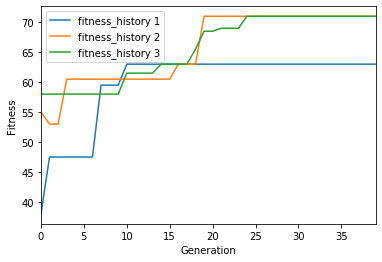

In [48]:
ax = history_df.plot()
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')

In [ ]:
def hyper_parameter( population_size=10,number_gen=10,num_replicate=10,mutation_rate=0.5):
    best_pop_hist = []
    best_fitness_hist = []
    for i in range(num_replicate):
        pop_history, fitness_history = replicate(population_size,number_gen, mutation_rate)
        
        best_pop_hist.append(pop_history)
        best_fitness_hist.append(fitness_history[0])
        
    return best_pop_hist , best_fitness_hist
        

In [ ]:
pop1 ,ft1 = hyper_parameter( population_size=50,number_gen=20,num_replicate=10,mutation_rate=0.01)
pop2 ,ft2 = hyper_parameter( population_size=60,number_gen=10,num_replicate=10,mutation_rate=0.6)
pop3 ,ft3 = hyper_parameter( population_size=40,number_gen=15,num_replicate=10,mutation_rate=0.8)

In [ ]:
history_df = pd.DataFrame({
    "Step 1": ft1,
    "Step 2": ft2,
    "Step 3" : ft3
})

In [ ]:
ax = history_df.plot()
ax.set_xlabel('Replicate')
ax.set_ylabel('Fitness')


[8, 3, 0, 5, 3, 7, 1, 9, 6, 0, 9, 4, 4, 3, 9, 7, 4, 7, 8, 2, 0, 0, 8, 4, 2]